# **Creación de un Modelo de Regresión Logística para la Predicción de Delitos**
###Esta es la segunda parte del proyecto. En la primera parte, realizamos el análisis exploratorio de datos (EDA).

####  Importamos Librerías necesarias y cargamos los datos limpios.



In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

In [8]:
df = pd.read_csv('crime_data_clear.csv')

In [9]:
df['TARGET'] = df['TARGET'].replace({'ROBO': 'ROBO', 'HURTO': 'ROBO', 'ASALTO': 'ROBO'})

In [37]:
df.head()

,X,Y,DATETIME,TARGET,DAY,YEAR,HOUR,MONTH,DAYOFWEEK
0,-76.624824,39.252974,2018-04-02 04:00:00+00:00,1,2,2018,4,4,0
1,-76.592225,39.343284,2019-02-01 08:00:00+00:00,1,1,2019,8,2,4
2,-76.625705,39.284369,2017-09-27 21:00:00+00:00,1,27,2017,21,9,2
3,-76.478282,39.270194,2017-03-21 11:00:00+00:00,FALSO,21,2017,11,3,1
4,-76.576006,39.291228,2017-03-07 02:00:00+00:00,1,7,2017,2,3,1
...,...,...,...,...,...,...,...,...,...
236365,-76.614490,39.277099,2017-01-21 11:00:00+00:00,1,21,2017,11,1,5
236366,-76.560945,38.734335,2017-10-02 18:00:00+00:00,FALSO,2,2017,18,10,0
236367,-76.597153,39.234203,2017-08-06 11:00:00+00:00,1,6,2017,11,8,6
236368,-76.640145,39.308469,2019-01-06 12:00:00+00:00,1,6,2019,12,1,6


> Volvemos la carateristica de ```df['TARGET'] ``` a binario 0 y 1.
 * Donde 0 significa: No robo/ no delitos
 * Y 1 significa: Robo/delitos



In [48]:
df['TARGET'] = df['TARGET'].replace({'ROBO': 1, 'FALSO': 0})

 Nos quedamos con las variables mas importantes, que vimos en el analisis EDA, en este caso X,Y que seria la variables predictoras. Por otro lado agregamos a TARGET que seria la variable objetivo.


In [50]:
df = df[['X','Y','TARGET']]
df

,X,Y,TARGET
0,-76.624824,39.252974,1
1,-76.592225,39.343284,1
2,-76.625705,39.284369,1
3,-76.478282,39.270194,0
4,-76.576006,39.291228,1
...,...,...,...
236365,-76.614490,39.277099,1
236366,-76.560945,38.734335,0
236367,-76.597153,39.234203,1
236368,-76.640145,39.308469,1


##¿Están balanceadas las variables?

######Es crucial plantearse esta pregunta para prevenir problemas durante la creación del modelo. Un conjunto de datos con variables desequilibradas puede llevar a resultados sesgados o poco fiables en el análisis estadístico o en el entrenamiento de modelos de aprendizaje automático.

Aquí les dejo un artículo que me vino de lujo cuando estaba creando este modelo, por si les gustaría profundizar en el tema:
> https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/





In [12]:
df.value_counts('TARGET')

TARGET
ROBO     213160
FALSO     23210
Name: count, dtype: int64

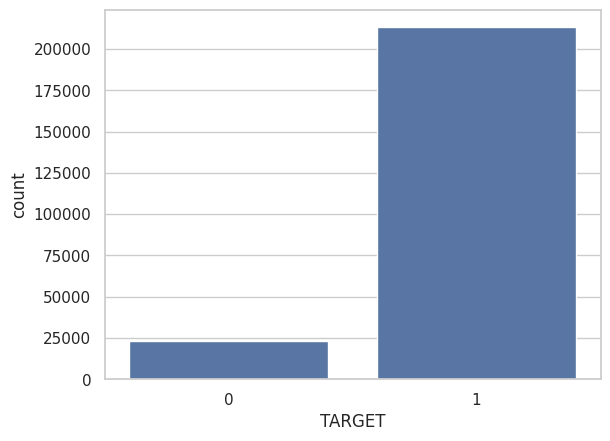

In [93]:
sns.countplot(x='TARGET', data=df)
plt.show()

### **VEMOS QUE LA CLASE NO ESTA VALACEADA**

In [58]:
X = X = df[['X', 'Y']]
y = df['TARGET']

In [59]:
# mis variable SON X Y
# LA PREDICTORA ES EL TARGET
# Los datos estan desbalaceado como dije pero estoy usando class_weight="balanced" sirve para balacear el modelo
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")

In [60]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(class_weight='balanced', random_state=1, solver='newton-cg')

In [85]:
y_pred = model.predict(X_test)
print("Exactitud: ",accuracy_score(y_test, y_pred).round(2))

Exactitud:  0.95


> La exactitud es de 95%

# Matriz de confusión

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 5464  1503]
 [ 1823 62121]]


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      6967
           1       0.98      0.97      0.97     63944

    accuracy                           0.95     70911
   macro avg       0.86      0.88      0.87     70911
weighted avg       0.95      0.95      0.95     70911



In [92]:
# Realiza validación cruzada para ver si el rendimiento es consistente porque no me fijo
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
# Efectivamente es un modelo decente

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search alg

Cross-validation scores: [0.95215129 0.95320895 0.9512417  0.95162246 0.95333587]
Mean score: 0.952312053137031


# Explicacion de los resultados

# Precisión (Precision)

Esto mide cuántas de las predicciones positivas del modelo fueron realmente correctas.

- Para la clase 0 (que podríamos pensar como "no robo"): 75% de las veces que el modelo predijo que no habría un robo, estaba en lo correcto.
- Para la clase 1 (que podríamos pensar como "robo"): 98% de las veces que el modelo predijo que habría un robo, estaba en lo correcto.

# Sensibilidad (Recall)

Esto mide cuántos de los casos verdaderos fueron correctamente identificados por el modelo.

- Para la clase 0: De todos los casos donde realmente no hubo un robo, el modelo identificó correctamente el 78%.
- Para la clase 1: De todos los casos donde realmente hubo un robo, el modelo identificó correctamente el 97%.

# Puntuación F1 (F1-Score)

Es una combinación de precisión y sensibilidad en una sola métrica.

- Para la clase 0: La puntuación es 0.77, lo que significa que el modelo es bastante bueno en predecir correctamente los casos donde no hubo un robo.
- Para la clase 1: La puntuación es 0.97, lo que indica que el modelo es excelente en predecir correctamente los casos donde hubo un robo.

# Exactitud (Accuracy)

Es el porcentaje de predicciones correctas sobre todas las predicciones. En este caso, el modelo tiene una exactitud del 95%, lo que significa que el modelo acertó el 95% de las veces.

# Promedio Macro (Macro Avg)

Es el promedio de las métricas (precisión, sensibilidad y puntuación F1) considerando cada clase por igual.

- La precisión promedio es 0.86, la sensibilidad promedio es 0.88, y la puntuación F1 promedio es 0.87.

# Promedio Ponderado (Weighted Avg)

Similar al promedio macro, pero este promedio toma en cuenta el número de casos en cada clase.

- Aquí, las métricas son todas de 0.95, lo que indica que el modelo está funcionando muy bien en general.


# Conclusión
este modelo está funcionando muy bien en predecir robos, especialmente en los casos donde realmente ocurren robos. Tiene una alta precisión y sensibilidad, lo que significa que identifica correctamente la mayoría de los robos y pocas veces se equivoca al decir que no habrá un robo cuando en realidad lo hay.